In [ ]:
!ls /content/drive


MyDrive  Othercomputers


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!ls /content/drive/MyDrive/url_classification


 final_4class_imbalanced.csv					 MANU.csv
'Kaggle1_feature_engineering(Manual Feature Extraction).ipynb'


In [ ]:
import pandas as pd

df_new = pd.read_csv("/content/drive/MyDrive/url_classification/MANU.csv")

print(df_new.shape)
df_new.head()


(602016, 81)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Extension,SymbolCount_AfterPath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_AfterPath,NumberOfDotsInHost,URL_Type_obf_Type
0,0,0,1,0.0,0,16.000000,0,4,9,0,...,0,0,3.375000,0.000000,0.000000,3.392747,1.000000,0.0,0,Phishing
1,0,0,3,0.0,0,11.000000,0,9,20,1,...,0,0,4.079143,0.000000,3.572469,2.855389,2.000000,0.0,0,Safe
2,0,0,4,0.0,0,7.000000,0,6,19,0,...,0,0,3.708093,0.000000,3.479080,-0.000000,1.584963,0.0,0,Safe
3,0,2,3,5.0,7,32.333333,3,38,55,0,...,0,0,4.240544,3.277613,3.321928,3.813899,2.000000,0.0,1,Safe
4,0,0,7,0.0,0,5.571429,0,10,21,0,...,0,0,4.385754,0.000000,4.262199,3.251629,0.000000,0.0,0,Safe


In [ ]:
import pandas as pd

df = pd.read_csv(
    "/content/drive/MyDrive/url_classification/final_4class_imbalanced.csv"
)

print(df.shape)
df.head()


(602016, 2)


,url,label
0,br-icloud.com.br,Phishing
1,mp3raid.com/music/krizz_kaliko.html,Safe
2,bopsecrets.org/rexroth/cr/1.htm,Safe
3,http://buzzfil.net/m/show-art/ils-etaient-loin...,Safe
4,espn.go.com/nba/player/_/id/3457/brandon-rush,Safe


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/url_classification/MANU.csv")

print(df.shape)
df['URL_Type_obf_Type'].value_counts()


(602016, 81)


,count
URL_Type_obf_Type,
Safe,428103
Phishing,94111
Spam,47282
Malware,32520


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/url_classification/MANU.csv")

print(df.shape)
df.head()


(602016, 81)


,Querylength,domain_token_count,path_token_count,avgdomaintokenlen,longdomaintokenlen,avgpathtokenlen,tld,charcompvowels,charcompace,ldl_url,...,SymbolCount_Extension,SymbolCount_AfterPath,Entropy_URL,Entropy_Domain,Entropy_DirectoryName,Entropy_Filename,Entropy_Extension,Entropy_AfterPath,NumberOfDotsInHost,URL_Type_obf_Type
0,0,0,1,0.0,0,16.000000,0,4,9,0,...,0,0,3.375000,0.000000,0.000000,3.392747,1.000000,0.0,0,Phishing
1,0,0,3,0.0,0,11.000000,0,9,20,1,...,0,0,4.079143,0.000000,3.572469,2.855389,2.000000,0.0,0,Safe
2,0,0,4,0.0,0,7.000000,0,6,19,0,...,0,0,3.708093,0.000000,3.479080,-0.000000,1.584963,0.0,0,Safe
3,0,2,3,5.0,7,32.333333,3,38,55,0,...,0,0,4.240544,3.277613,3.321928,3.813899,2.000000,0.0,1,Safe
4,0,0,7,0.0,0,5.571429,0,10,21,0,...,0,0,4.385754,0.000000,4.262199,3.251629,0.000000,0.0,0,Safe


In [ ]:
label_map = {
    "Safe": 0,
    "Phishing": 1,
    "Spam": 2,
    "Malware": 3
}

df["label_encoded"] = df["URL_Type_obf_Type"].map(label_map)

# Kontrol
df[["URL_Type_obf_Type", "label_encoded"]].value_counts().head()


,,count
URL_Type_obf_Type,label_encoded,
Safe,0,428103
Phishing,1,94111
Spam,2,47282
Malware,3,32520


In [ ]:
# Feature matrisi (X) ve hedef değişken (y)
X = df.drop(columns=["URL_Type_obf_Type", "label_encoded"])
y = df["label_encoded"]

print(X.shape)
print(y.shape)


(602016, 80)
(602016,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("X_train:", X_train.shape)
print("X_test :", X_test.shape)
print("y_train:", y_train.shape)
print("y_test :", y_test.shape)


X_train: (481612, 80)
X_test : (120404, 80)
y_train: (481612,)
y_test : (120404,)


In [ ]:
from sklearn.linear_model import LogisticRegression

# Modeli oluştur
model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

# Modeli eğit
model.fit(X_train, y_train)

print("Model eğitimi tamamlandı ✅")


Model eğitimi tamamlandı ✅


In [ ]:
# Test seti üzerinde tahmin
y_pred = model.predict(X_test)

# Kontrol
y_pred[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8907594432078668


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.98      0.94     85621
           1       0.80      0.48      0.60     18822
           2       0.85      0.96      0.90      9457
           3       0.89      0.80      0.84      6504

    accuracy                           0.89    120404
   macro avg       0.86      0.80      0.82    120404
weighted avg       0.88      0.89      0.88    120404



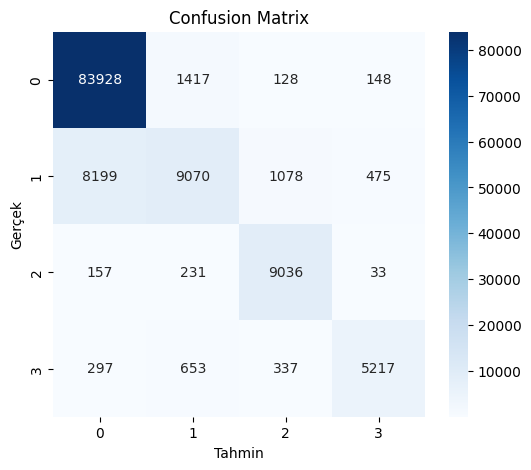

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)

plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(
    max_iter=1000,
    n_jobs=-1,
    class_weight="balanced"
)

model.fit(X_train, y_train)


LogisticRegression(class_weight='balanced', max_iter=1000, n_jobs=-1)

In [ ]:
# Test seti üzerinde tahmin
y_pred = model.predict(X_test)

# İlk 10 tahmin (kontrol)
y_pred[:10]


array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [ ]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.8537507059566127


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      0.86      0.91     85621
           1       0.58      0.76      0.65     18822
           2       0.82      0.97      0.89      9457
           3       0.69      0.88      0.77      6504

    accuracy                           0.85    120404
   macro avg       0.76      0.87      0.81    120404
weighted avg       0.88      0.85      0.86    120404



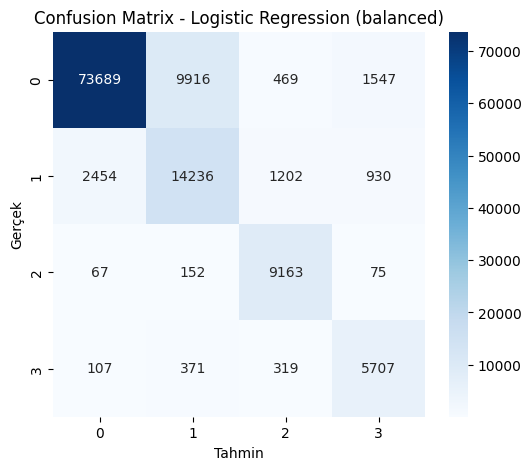

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues"
)
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Logistic Regression (balanced)")
plt.show()


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    n_jobs=-1,
    class_weight="balanced"
)

rf_model.fit(X_train, y_train)

print("Random Forest eğitimi tamamlandı ✅")


Random Forest eğitimi tamamlandı ✅


In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred_rf = rf_model.predict(X_test)

print("Accuracy (RF):", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy (RF): 0.9632819507657553
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     85621
           1       0.91      0.85      0.88     18822
           2       0.99      1.00      1.00      9457
           3       0.98      0.96      0.97      6504

    accuracy                           0.96    120404
   macro avg       0.96      0.95      0.96    120404
weighted avg       0.96      0.96      0.96    120404



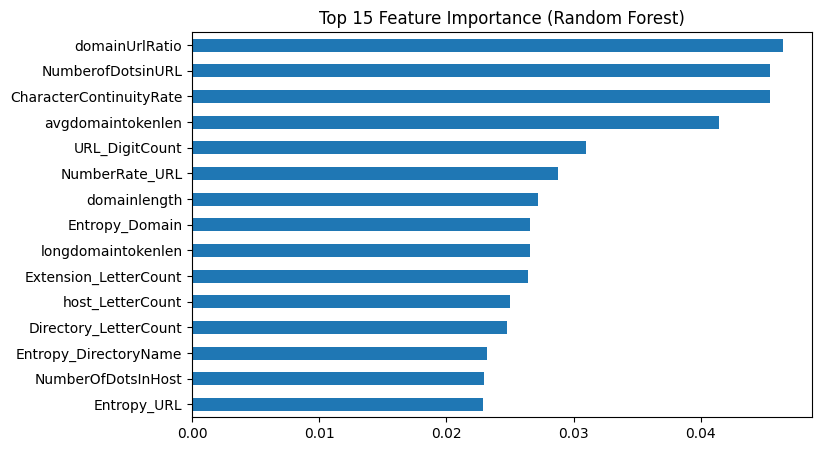

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X.columns

feat_imp = pd.Series(importances, index=feature_names)
feat_imp = feat_imp.sort_values(ascending=False).head(15)

plt.figure(figsize=(8,5))
feat_imp.plot(kind="barh")
plt.title("Top 15 Feature Importance (Random Forest)")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/url_classification/MANU.csv")
print(df.shape)


(602016, 81)
